# doc for tree regression:
# https://scikit-learn.org/stable/modules/tree.html#tree-classification

++ Some advantages of decision trees are:

Simple to understand and to interpret. Trees can be visualised.

Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.

The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.

Able to handle both numerical and categorical data. Other techniques are usually specialised in analysing datasets that have only one type of variable. See algorithms for more information.

Able to handle multi-output problems.

Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.

Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.

Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

++ The disadvantages of decision trees include:

Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning (not currently supported), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.

Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.

There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.

Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

In [12]:
# Decision Tree Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

import sys, os
pwd = os.getcwd()

printmd('+ **Directory of this workbook**:')
print '\tpwd =', pwd

data_path = pwd+'/Decision_Tree_Regression/Position_Salaries.csv'
printmd('\n  + **Full path of the data file**:')
print '\tdata_path =', data_path

dataset = pd.read_csv(data_path)

dataset.head(100)

+ **Directory of this workbook**:

	pwd = /eos/home-f/franzoni/SWAN_projects/ML-A-Z-Hands-On-Python-R/Machine_Learning_A-Z_Template_Folder/Part_2_-_Regression/Section_8_-_Decision_Tree_Regression



  + **Full path of the data file**:

	data_path = /eos/home-f/franzoni/SWAN_projects/ML-A-Z-Hands-On-Python-R/Machine_Learning_A-Z_Template_Folder/Part_2_-_Regression/Section_8_-_Decision_Tree_Regression/Decision_Tree_Regression/Position_Salaries.csv


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [24]:
X = dataset.iloc[:, 1:2].values
print(X)
y = dataset.iloc[:, 2].values
#print(y)

# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

y_pred: [150000.]


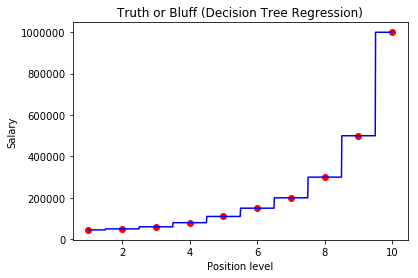

In [38]:
# Predicting a new result
#print(__doc__)
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.asarray.html
y_pred = regressor.predict([[6.5]])
y_pred = regressor.predict(np.asarray([[6.5]]))
                           
#from __future__ import print_function
print('y_pred: %s'%y_pred)
                           
# Visualising the Decision Tree Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()